

```
# Isto está formatado como código
```

#Demonstração bias

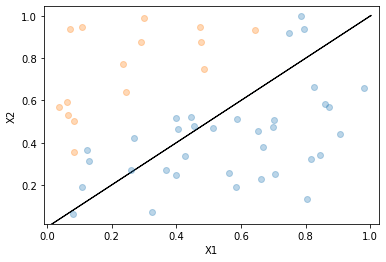

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp

X, y = geradataset(50)
plotadataset(X, y)
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plt.arrow(*[0,0], *hiperplano)
plt.show()

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[[1.   0.   0.25]
 [1.   0.25 0.5 ]
 [1.   0.5  0.75]
 [1.   0.75 1.  ]]
[0. 0. 0. 0.]
[1, 0.125, 0.75]
-0.375


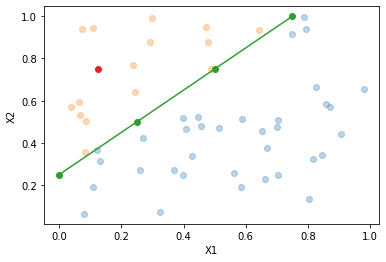

In [ ]:
def f(x1):
    return x1+0.25

plotadataset(X, y)

x1 = np.array([0, 0.25, 0.5, 0.75])
x2 = f(x1)
plt.plot(x1, x2, 'o-')

print(x1 + 0.25 == x2)
print(x1 - x2 + 0.25 == 0)
print(0.25 + x1 - x2 == 0)
x0 = np.array([1, 1, 1, 1])
print(0.25*x0 + 1*x1 -1*x2 == 0)
print(x0*0.25 + x1*1 + x2*(-1) == 0)

coefs = np.array([0.25, 1, -1])
dados = np.stack((x0, x1, x2)).T
print(dados)

print(np.matmul(dados, coefs))

ponto = [0.125, 0.75]
plt.plot(*ponto, 'o')

p1 = [1]
p1.extend(ponto)
print(p1)
print(np.matmul(p1, coefs))

plt.show()

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.5
        self.maxiter = 200
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias, X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            ypred = self.predict(X)
            erro = y - ypred
            custo = np.sum(erro**2)
            if custo==0:
                break
            self.w = self.w + self.alpha*np.matmul(erro, Xb)

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = np.matmul(Xb, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(perceptron.w)
sum(y == ypred)/len(y)


[  8.0661931   32.22540952 -31.77655951]


1.0